In [1]:

import datetime
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functools import partial

from utils import Scale
from utils import smooth_signal
from utils import is_dawn_partial, is_day_partial, is_night_partial
from utils import location_station, find_set_sunrise, find_set_sunset
from utils import generate_vm_vd

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')
df_station = pd.read_pickle('./data/df_station_sort_re.pkl')

In [3]:
lat = df_station.loc[df_station['identificationstation'] == 'sj2']['latitude'].values[0]
long = df_station.loc[df_station['identificationstation'] == 'sj2']['longitude'].values[0]

In [4]:
is_day = partial(is_day_partial, lat=lat, long=long)
is_night = partial(is_night_partial, lat=lat, long=long)
is_dawn = partial(is_dawn_partial, lat=lat, long=long)

In [5]:
state_day = []
for i in df.index.values:
    state_day.append(is_day(i))

state_day = np.array(state_day)
df['state_day'] = state_day

state_night = []
for i in df.index.values:
    state_night.append(is_night(i))

state_night = np.array(state_night)
df['state_night'] = state_night

state_dawn = []
for i in df.index.values:
    state_dawn.append(is_dawn(i))

state_dawn = np.array(state_dawn)
df['state_dawn'] = state_dawn

In [6]:
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4,state_day,state_night,state_dawn
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334,0.0,0.0,1.0
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397,0.0,0.0,1.0
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683,0.0,0.0,1.0
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552,0.0,0.0,1.0
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917,0.0,0.0,1.0
2013-12-01 04:20:00,28.194797,-1.748643,-0.318996,-1.279775,0.399478,15.846379,2.116655,0.183615,0.0,0.0,1.0
2013-12-01 04:30:00,26.140187,-1.970060,-0.221417,-0.971635,0.295367,17.265745,1.481490,0.186186,0.0,0.0,1.0
2013-12-01 04:40:00,23.954667,-2.040046,-0.069986,-0.856185,0.185794,18.030494,0.804197,0.186092,0.0,0.0,1.0
2013-12-01 04:50:00,21.846906,-1.938287,0.101759,-0.851142,0.127668,18.167486,0.137714,0.185635,0.0,0.0,1.0
2013-12-01 05:00:00,20.044188,-1.686945,0.251341,-0.811061,0.151654,17.689626,-0.491694,0.186621,0.0,0.0,1.0


In [7]:
df['state_day_shift'] = df['state_day'].shift(1)
df.head(10)

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4,state_day,state_night,state_dawn,state_day_shift
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334,0.0,0.0,1.0,NaN
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397,0.0,0.0,1.0,0.0
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683,0.0,0.0,1.0,0.0
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552,0.0,0.0,1.0,0.0
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917,0.0,0.0,1.0,0.0
2013-12-01 04:20:00,28.194797,-1.748643,-0.318996,-1.279775,0.399478,15.846379,2.116655,0.183615,0.0,0.0,1.0,0.0
2013-12-01 04:30:00,26.140187,-1.970060,-0.221417,-0.971635,0.295367,17.265745,1.481490,0.186186,0.0,0.0,1.0,0.0
2013-12-01 04:40:00,23.954667,-2.040046,-0.069986,-0.856185,0.185794,18.030494,0.804197,0.186092,0.0,0.0,1.0,0.0
2013-12-01 04:50:00,21.846906,-1.938287,0.101759,-0.851142,0.127668,18.167486,0.137714,0.185635,0.0,0.0,1.0,0.0
2013-12-01 05:00:00,20.044188,-1.686945,0.251341,-0.811061,0.151654,17.689626,-0.491694,0.186621,0.0,0.0,1.0,0.0


In [8]:
delta_t = np.timedelta64(1, 'h')

df['vm1'], df['vd1'] = generate_vm_vd(df, delta_t)

In [9]:
delta_t = np.timedelta64(2, 'h')

df['vm2'], df['vd2'] = generate_vm_vd(df, delta_t)

In [10]:
df[['vm1', 'vd1', 'vm2', 'vd2']][120:150].head()

,vm1,vd1,vm2,vd2
2013-12-01 23:30:00,38.983657,1.803481,41.632905,3.426694
2013-12-01 23:40:00,38.983657,1.803481,41.632905,3.426694
2013-12-01 23:50:00,38.983657,1.803481,41.632905,3.426694
2013-12-02 00:00:00,38.983657,1.803481,41.632905,3.426694
2013-12-02 00:10:00,38.983657,1.803481,41.632905,3.426694


In [11]:
#df['gvtec1_dt_lag_9'] = smooth_signal(df['gvtec1'] -  df['gvtec1'].shift(9))
#df['gvtec2_dt_lag_20'] = smooth_signal(df['gvtec2'] -  df['gvtec2'].shift(20))

df['gvtec1_dt_lag_9'] = df['gvtec1'] -  df['gvtec1'].shift(9)
df['gvtec2_dt_lag_20'] = df['gvtec2'] -  df['gvtec2'].shift(20)

In [12]:
#df['vtec_dt_lag_3'] = smooth_signal(df['vtec'] -  df['vtec'].shift(3))
df['vtec_dt_lag_3'] = df['vtec'] -  df['vtec'].shift(3)

In [13]:
df = df.dropna()


# select some features to continue
df = df[['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
         'gvtec2_dt', 'state_day', 'state_night', 'state_dawn',
         'vm1', 'vd1', 'vm2', 'vd2', 'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4']]

# drop day, continue with just night
df = df[df['state_day'] == 0.0]
if 'state_day' in df.columns.values:
    df = df.drop('state_day', axis=1)

df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,state_night,state_dawn,vm1,vd1,vm2,vd2,gvtec1_dt_lag_9,gvtec2_dt_lag_20,vtec_dt_lag_3,s4
2013-12-01 21:40:00,36.877390,-0.170033,0.335078,-3.048065,0.096289,-2.907215,-0.265355,1.0,0.0,38.983657,1.803481,41.632905,3.426694,-0.566764,-5.502811,-1.766987,0.177822
2013-12-01 21:50:00,37.131272,0.216655,0.386689,-2.773296,0.172740,-1.750093,0.906307,1.0,0.0,38.983657,1.803481,41.632905,3.426694,-0.210438,-4.341393,-0.647162,0.180049
2013-12-01 22:00:00,37.877660,0.560146,0.343491,-2.484819,0.158693,0.583867,1.857452,1.0,0.0,38.983657,1.803481,41.632905,3.426694,0.054384,-2.830111,0.733999,0.183688
2013-12-01 22:10:00,38.863345,0.795685,0.235539,-2.341564,0.031913,3.496344,2.421628,1.0,0.0,38.983657,1.803481,41.632905,3.426694,0.147566,-1.425555,1.985955,0.186903
2013-12-01 22:20:00,39.850060,0.902925,0.107240,-2.474694,-0.181491,6.352723,2.587949,1.0,0.0,38.983657,1.803481,41.632905,3.426694,0.039327,-0.524524,2.718789,0.187446


In [14]:
df.to_pickle('./data/sj2_analise_update.pkl')
df.to_csv('./data/sj2_analise_update.csv')

In [15]:
# to s4 data
value_min_s4 = df['s4'].min()
value_max_s4 = df['s4'].max()

print('Valor mínimo de s4:', value_min_s4)
print('Valor máximo de s4:', value_max_s4)

scale_s4 = Scale(value_min_s4, value_max_s4)
s4_scale = pd.Series(scale_s4(df['s4'].values.ravel()), index=df.index)

# to gvtec_lag_9 data
value_min_gvtec_lag_9 = df['gvtec1_dt_lag_9'].min()
value_max_gvtec_lag_9 = df['gvtec1_dt_lag_9'].max()

print('Valor mínimo de gvtec_lag_9:', value_min_gvtec_lag_9)
print('Valor máximo de gvtec_lag_9:', value_max_gvtec_lag_9)

scale_gvtec_lag_9 = Scale(value_min_gvtec_lag_9, value_max_gvtec_lag_9)
gvtec_lag_9_scale = pd.Series(scale_gvtec_lag_9(df['gvtec1_dt_lag_9'].values.ravel()), index=df.index)

# to gvtec_lag_20 data
value_min_gvtec_lag_20 = df['gvtec2_dt_lag_20'].min()
value_max_gvtec_lag_20 = df['gvtec2_dt_lag_20'].max()

print('Valor mínimo de gvtec_lag_20:', value_min_gvtec_lag_20)
print('Valor máximo de gvtec_lag_20:', value_max_gvtec_lag_20)

scale_gvtec_lag_20 = Scale(value_min_gvtec_lag_20, value_max_gvtec_lag_20)
gvtec_lag_20_scale = pd.Series(scale_gvtec_lag_20(df['gvtec2_dt_lag_20'].values.ravel()), index=df.index)


Valor mínimo de s4: 0.11990822024186153
Valor máximo de s4: 0.7698330806187225
Valor mínimo de gvtec_lag_9: -26.463953137054844
Valor máximo de gvtec_lag_9: 40.67748111557366
Valor mínimo de gvtec_lag_20: -45.18333053562972
Valor máximo de gvtec_lag_20: 65.61150011828813


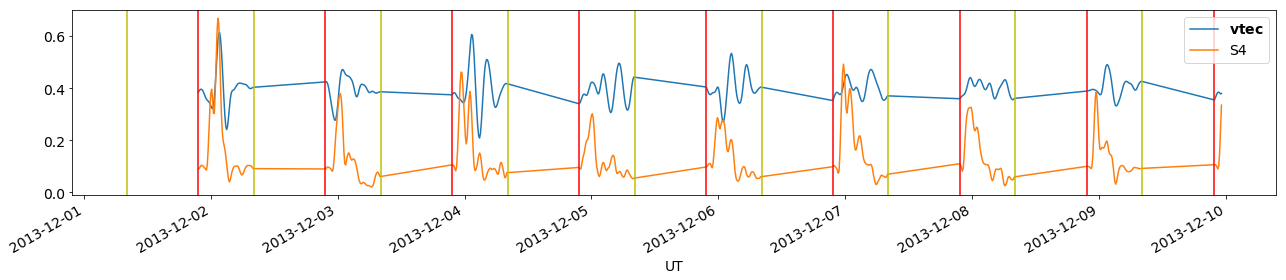

In [16]:
a = 0
b = 512

fig, ax = plt.subplots(1, 1)
figsize=(18, 4)
gvtec_lag_9_scale[a:b].plot(figsize=figsize, ax=ax, label=r'$\bf vtec$')
s4_scale[a:b].plot(figsize=figsize, ax=ax, label='S4')
ax.legend(loc="upper right")
ax.set(xlabel='UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(s4_scale[a:b], lat, long)
set_of_sunset = find_set_sunset(s4_scale[a:b], lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/gvtec1_lag_9_scatter.eps', format='eps', dpi=1000)

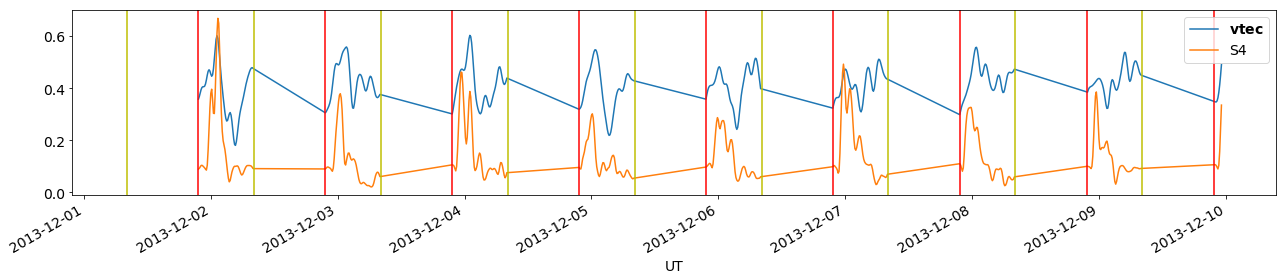

In [17]:
a = 0
b = 512

fig, ax = plt.subplots(1, 1)
figsize=(18, 4)
gvtec_lag_20_scale[a:b].plot(figsize=figsize, ax=ax, label=r'$\bf vtec$')
s4_scale[a:b].plot(figsize=figsize, ax=ax, label='S4')
ax.legend(loc="upper right")
ax.set(xlabel='UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(s4_scale[a:b], lat, long)
set_of_sunset = find_set_sunset(s4_scale[a:b], lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/gvtec2_lag_20_scatter.eps', format='eps', dpi=1000)